In [17]:
import os
import numpy as np
from matplotlib import pyplot as plt

from dep_cache import *
from dep_declarations import *

In [18]:
Ntr = 6000
Nte = 2000
alphas100 = [0, 1, 2, 4, 8, 10, 16, 32, 64, 100, 128]
alphas = [a / 100 for a in alphas100]

In [19]:
pairs = []
for i in range(0,10):
    for j in range(i+1,10):
        pairs.append((i,j))

In [6]:
cache = ParallelDependencyCache(n_threads = 4)

for pair in pairs:
    i = pair[0]
    j = pair[1]
    cache.request(CovSpec(Ntr,Nte,i,j))
    cache.request(KernelSpec(Ntr,Nte,i,j))
    for alpha100 in alphas100:
        cache.request(Errors(Ntr,Nte,i,j,alpha100))

cache.fetch_all()

already cached: ./cache/covspec_400_200_0_1.npz
already cached: ./cache/kernelspec_400_200_0_1.npz
already cached: ./cache/errors_400_200_0_1_50.npy
already cached: ./cache/covspec_400_200_0_2.npz
already cached: ./cache/kernelspec_400_200_0_2.npz
already cached: ./cache/errors_400_200_0_2_50.npy
already cached: ./cache/covspec_400_200_0_3.npz
already cached: ./cache/kernelspec_400_200_0_3.npz
already cached: ./cache/errors_400_200_0_3_50.npy
already cached: ./cache/covspec_400_200_0_4.npz
already cached: ./cache/kernelspec_400_200_0_4.npz
already cached: ./cache/errors_400_200_0_4_50.npy
already cached: ./cache/covspec_400_200_0_5.npz
already cached: ./cache/kernelspec_400_200_0_5.npz
already cached: ./cache/errors_400_200_0_5_50.npy
already cached: ./cache/covspec_400_200_0_6.npz
already cached: ./cache/kernelspec_400_200_0_6.npz
already cached: ./cache/errors_400_200_0_6_50.npy
already cached: ./cache/covspec_400_200_0_7.npz
already cached: ./cache/kernelspec_400_200_0_7.npz
already

In [7]:
errors = {}
for pair in pairs:
    errors[pair] = {'train': [], 'test': []}
    for alpha100 in alphas100:
        train,test = Errors(Ntr, Nte, pair[0], pair[1], alpha100).get()
        errors[pair]['train'].append(train)
        errors[pair]['test'].append(test)

In [8]:
print('Cases where no-regularization does not perform the best')
for pair in pairs:
    m = np.min(np.argmin(errors[pair]['test']))
    if m != 0:
        print('in', pair, 'the min is', m)

Cases where no-regularization does not perform the best


In [9]:
kernel_spec = {}
for pair in pairs:
    spec = KernelSpec(Ntr, Nte, pair[0], pair[1]).get()
    kernel_spec[pair] = np.flip(np.sort(np.abs(spec)))

In [10]:
cov_spec = {}
for pair in pairs:
    spec = CovSpec(Ntr, Nte, pair[0], pair[1]).get()
    cov_spec[pair] = np.flip(np.sort(np.abs(spec)))

In [11]:
subpairs_errors = [(2,5),(2,6),(2,7),(2,8),(2,9),
                   (3,5),(3,6),(3,7),(3,8),(3,9),
                   (4,5),(4,6),(4,7),(4,8),(4,9)]

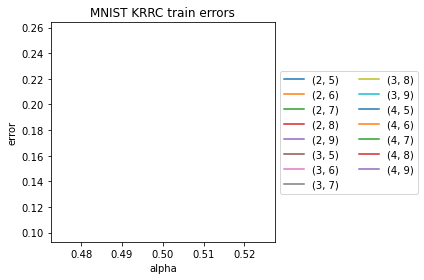

In [12]:
for pair in subpairs_errors:
    plt.plot(alphas, errors[pair]['train'], label=str(pair))

plt.title('MNIST KRRC train errors')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
plt.tight_layout()
plt.savefig('train_errors.png', dpi=96, facecolor='white', transparent=False)

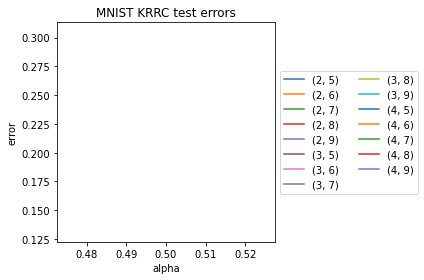

In [13]:
for pair in subpairs_errors:
    plt.plot(alphas, errors[pair]['test'], label=str(pair))

plt.title('MNIST KRRC test errors')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
plt.tight_layout()
plt.savefig('test_errors.png', dpi=96, facecolor='white', transparent=False)

In [14]:
subpairs_spectra = [(2,5),(2,9),(3,6),(3,8),(3,9),(4,7), (4,9)]
indices = list(range(1,101))

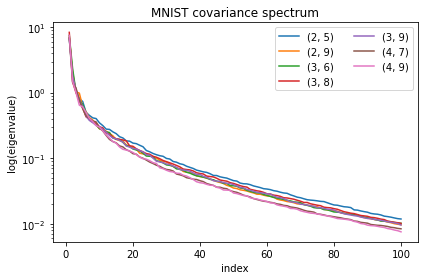

In [15]:
for pair in subpairs_spectra:
    plt.plot(indices, cov_spec[pair][:100], label=str(pair))

plt.title('MNIST covariance spectrum')
plt.xlabel('index')
plt.ylabel('log(eigenvalue)')
plt.yscale('log')
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig('spectrum_covariance.png', dpi=96, facecolor='white', transparent=False)

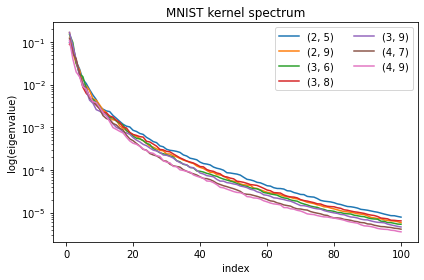

In [16]:
for pair in subpairs_spectra:
    plt.plot(indices, kernel_spec[pair][:100], label=str(pair))

plt.title('MNIST kernel spectrum')
plt.xlabel('index')
plt.ylabel('log(eigenvalue)')
plt.yscale('log')
plt.legend(ncol=2)
plt.tight_layout()
plt.savefig('spectrum_kernel.png', dpi=96, facecolor='white', transparent=False)